Step 1 : Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Step 2 : Loading  the dataset

In [4]:
from google.colab import files
upload =files.upload()

Saving Employee (1).csv to Employee (1).csv


In [5]:
df = pd.read_csv('Employee (1).csv')

Step 3 : Displaying the first few rows of the dataset

In [6]:
print(df.head())

   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


Step 4 : Exploring the unique value and its length

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column} - Unique Values: {unique_values}, Length: {len(unique_values)}")


Company - Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'], Length: 7
Age - Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.], Length: 30
Salary - Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.], Length: 41
Place - Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'], Length: 12
Country - Unique Values: ['India'], Length: 1
Gender - Unique Values: [0 1], Length: 2


Step 5 : Describing the dataset

In [8]:
print(df.describe())


              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None


Step 6 : Cleaning the dataset such as handling the missing values,remove duplicates,finding outliers

In [10]:
df['Age'].replace(0, np.nan, inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)


In [11]:
df = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

Step 7 : Data Analysis : Flitering the dataset

In [12]:
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

Step 8 : Data Analysis : Visualization of the dataset

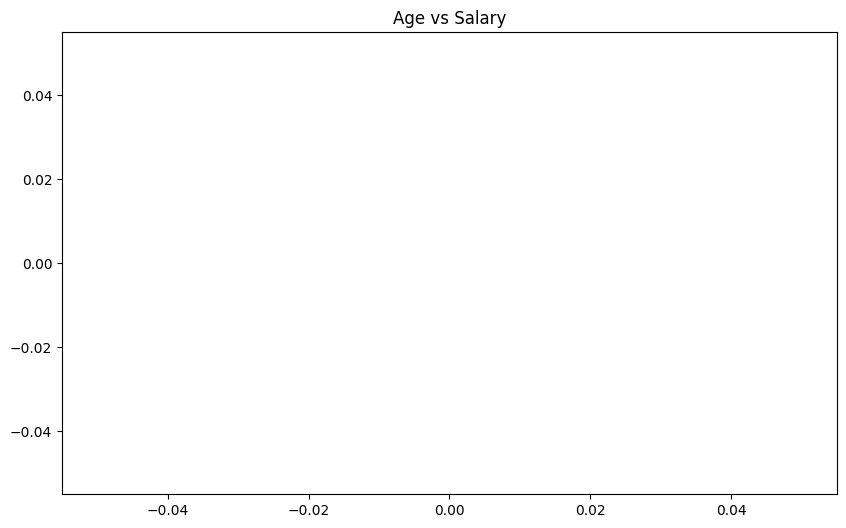

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Age', y='Salary')
plt.title('Age vs Salary')
plt.show()

Step 9 : Feature Scaling

In [14]:
if df.shape[0] == 0:
    print("DataFrame is empty. Scaling cannot be performed.")
else:
    # Standard Scaling
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

    # Min-Max Scaling
    min_max_scaler = MinMaxScaler()
    df_minmax_scaled = min_max_scaler.fit_transform(df.select_dtypes(include=[np.number]))

    # Convert scaled arrays back to DataFrame
    df_scaled = pd.DataFrame(df_scaled, columns=df.select_dtypes(include=[np.number]).columns)
    df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=df.select_dtypes(include=[np.number]).columns)

    print("Feature scaling applied successfully.")

DataFrame is empty. Scaling cannot be performed.
